# MINOR PROJECT 

## AIM: To build a Sentimental Analysis model based on classification task which could predict the reviews of the items written by the customers into positive or negative  reviews.

## DATASET USED: Amazon Reviews Dataset

This dataset has been extracted from Amazon's website.
This dataset consists of a 14337 Amazon reviews, star ratings, for 10 latest (as of mid-2019) bluetooth earphone devices for learning how to train Machine for sentiment analysis.

## THE ANALYSIS:

In this sentimental analysis,we will be classifying  the pieces of text as  positive and negative  to determine the sentiment behind them.

### Step 1: Read the data in csv format into python dataframes.

In [1]:

import pandas as pd
import re
df=pd.read_csv('AllProductReviews.csv')
df.head()



,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


Here,it can be seen that the dataframe contains Review Title,Review Body,Review Star and Product Name information.
The data ,mostly used for analysis will be 'Review Title',Review Body' and 'Review Star'.

## Step 2: Data Preparation

Here the dataset consists of four columns out of which the column titled "Product" is not required.So,we will drop that column.Along with that we will also remove the special character '\n'and emoticons  from  each line.




In [2]:
df=df.replace('\n',"",regex=True)
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F""]+", flags=re.UNICODE) 
def remove_emoji(string):
    return emoji_pattern.sub(r'', string)
df['ReviewTitle'] = df['ReviewTitle'].apply(remove_emoji)
df['ReviewBody']=df['ReviewBody'].apply(remove_emoji)



df=df.drop('Product',axis=1)
df.head()

,ReviewTitle,ReviewBody,ReviewStar
0,Honest review of an edm music lover,No doubt it has a great bass and to a great ex...,3
1,Unreliable earphones with high cost,"This earphones are unreliable, i bought it be...",1
2,Really good and durable.,"i bought itfor 999,I purchased it second time,...",4
3,stopped working in just 14 days,Its sound quality is adorable. overall it was ...,1
4,Just Awesome Wireless Headphone under 1000...,Its Awesome... Good sound quality & 8-9 hrs ba...,5


It cann be seen that  the special character  '\n' has been removed from  the dataframe.
Next,we will use 'ReviewTitle','ReviewBody' and 'ReviewStar' for the analysis.

###### 1.'ReviewTitle' consists of a title given by the customer for the purchased product.
###### 2.'ReviewBody' consists of the main summary of the review written by the customer.
###### 3.'ReviewStar' consists of the ratings of the purchased product.

## Step 3:Data Analysis

Now ,we will take a look at the variable 'ReviewStar' to see if majority of the customer ratings are positive or negative.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
#%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [4]:
from importlib import reload
reload(plt)
%matplotlib inline

In [5]:
fig=px.histogram(df,x='ReviewStar')
fig.update_traces(marker_color='turquoise',marker_line_color='rgb(8,49,107)',marker_line_width=2.5)
fig.update_layout(title_text='Rating Score')
fig.show()

From the above graph,it can be seen that most of the ratings are positive ,which thus leads to the assumption of most reviews being positive too.
To analyse this,now we will be creating some worldclouds to see the most frequently used words in the reviews.

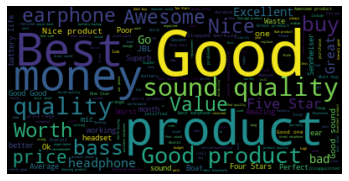

In [6]:
import nltk
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
stopwords.update(['br','href'])
text=" ".join(review for review in df.ReviewTitle)
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud11.png')
plt.show()

Seeing the above wordcloud it can be concluded that ,"Good","Best","Excellent","Awesome","Nice","Five Star","Great"are some of the words depicting positivity ,also indicating most reviews in the dataset expressing a positive sentiment.


## Step 4:Classifying the texts

In this step,we will classify the reviews into "positive "  and "negative",so that it could be used as training data for the sentiment analysis.

Positive reviews will be classified as +1  and negative will be as -1.

Classification will be done with the "ReviewStar" coloumn as follows:
1."ReviewStar" >3 as +1
2."ReviewStar" <3 as -1


In [7]:
df=df[df['ReviewStar']!=3]
df['sentiment']=df['ReviewStar'].apply(lambda rating:+1 if rating >3  else  -1)
df.head()



,ReviewTitle,ReviewBody,ReviewStar,sentiment
1,Unreliable earphones with high cost,"This earphones are unreliable, i bought it be...",1,-1
2,Really good and durable.,"i bought itfor 999,I purchased it second time,...",4,1
3,stopped working in just 14 days,Its sound quality is adorable. overall it was ...,1,-1
4,Just Awesome Wireless Headphone under 1000...,Its Awesome... Good sound quality & 8-9 hrs ba...,5,1
5,Charging port not working,"After 11 days, the charging port isn't working...",1,-1


Looking at the head of the dataframe now,a new column "sentiment" has been added which has the values 1 and -1.

## Step 5:More Data Analysis

Since ,the reviews have been classifies into positive,neutral and negative ,we will biuld worlclouds for each of them.
For that we will create three dataframes with positive ,neutral and negative reviews.

In [8]:
positive=df[df['sentiment']==1]
negative=df[df['sentiment']==-1]


### Wordcloud for Positive Sentiment

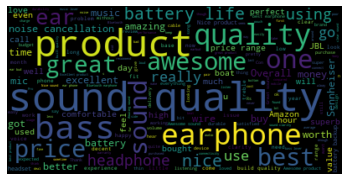

In [9]:
stopwords=set(STOPWORDS)
stopwords.update(['br','href','good'])
pos=" ".join(review for review in positive.ReviewBody)
wordcloud2=WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud2.png')
plt.show()





### Wordcloud for Negative Sentiment

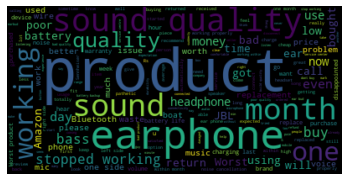

In [10]:
neg=" ".join(review for review in negative.ReviewBody)
wordcloud3=WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3,interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud3.png')
plt.show()

As it can be seen from the two wordclouds ,the positive worldcloud2 is full of positive words like "great","awesome","excellent","nice", and "amazing" and  the wordcloud3 for negative sentiment consists of "bad","stopped working","waste","worst" and "poor" indicating negativity ..

### Distribution of reviews

In [11]:
df['sentiment']=df['sentiment'].replace({-1:'negative'})
df['sentiment']=df['sentiment'].replace({+1:'positive'})
fig=px.histogram(df,x='sentiment')
fig.update_traces(marker_color='orange',marker_line_color='rgb(45,78,190)',marker_line_width=3.5)
fig.update_layout(title_text="Product Sentiment")
fig.show()
df['sentiment']

1        negative
2        positive
3        negative
4        positive
5        negative
           ...   
14332    positive
14333    positive
14334    negative
14335    positive
14336    negative
Name: sentiment, Length: 12834, dtype: object

In [12]:
df['sentiment']=df['sentiment'].replace({'negative':-1})
df['sentiment']=df['sentiment'].replace({'positive':+1})

## Step 6: Building the Model

Now, the sentimental analysis model will be builded which will take the reviews as input and predict them as positive,negative or neutral.
This is a classification task for which we will train a simple logistic regression .

In [13]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,sentiment
1,Unreliable earphones with high cost,"This earphones are unreliable, i bought it be...",1,-1
2,Really good and durable.,"i bought itfor 999,I purchased it second time,...",4,1
3,stopped working in just 14 days,Its sound quality is adorable. overall it was ...,1,-1
4,Just Awesome Wireless Headphone under 1000...,Its Awesome... Good sound quality & 8-9 hrs ba...,5,1
5,Charging port not working,"After 11 days, the charging port isn't working...",1,-1







Here in the above dataframe,the sentiment column has been replaced by positive for +1 and negative for -1.From this dataframe ,'ReviewBody' column will be used for predicting the sentiment.
For that,first need to remove all the punctuation from the data.

In [14]:
import string

In [15]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text
df['ReviewTitle']=df['ReviewTitle'].apply(remove_punctuation)
df=df.dropna(subset=['ReviewBody'])
df['ReviewBody']=df['ReviewBody'].apply(remove_punctuation)
df['ReviewBody']

1        This  earphones are unreliable i bought it bef...
2        i bought itfor 999I purchased it second time g...
3        Its sound quality is adorable overall it was g...
4        Its Awesome Good sound quality  89 hrs battery...
5        After 11 days the charging port isnt working a...
                               ...                        
14332                                                 Good
14333                  An amazing product but a bit costly
14334                                                Sound
14335    the sound is good battery life is good but the...
14336    M writing this review after using for almost 7...
Name: ReviewBody, Length: 12834, dtype: object

In [16]:
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)  

def remove_emoji(string):
    return emoji_pattern.sub(r'', string)

df['ReviewTitle'] = df['ReviewTitle'].apply(remove_emoji)
df['ReviewBody']=df['ReviewBody'].apply(remove_emoji)
df=df.replace('\n',"",regex=True)
df.head()

,ReviewTitle,ReviewBody,ReviewStar,sentiment
1,Unreliable earphones with high cost,This earphones are unreliable i bought it bef...,1,-1
2,Really good and durable,i bought itfor 999I purchased it second time g...,4,1
3,stopped working in just 14 days,Its sound quality is adorable overall it was g...,1,-1
4,Just Awesome Wireless Headphone under 1000,Its Awesome Good sound quality 89 hrs battery...,5,1
5,Charging port not working,After 11 days the charging port isnt working a...,1,-1



The new dataframe will only have two columns "ReviewBody" and "Sentiment".

In [17]:
dfnew=df[['ReviewBody','sentiment']]
dfnew.head()


,ReviewBody,sentiment
1,This earphones are unreliable i bought it bef...,-1
2,i bought itfor 999I purchased it second time g...,1
3,Its sound quality is adorable overall it was g...,-1
4,Its Awesome Good sound quality 89 hrs battery...,1
5,After 11 days the charging port isnt working a...,-1





Now ,there will be splitting up of the data frame into train and test sets.80% of the data will be used for training and 20% will be used for testing.

#### Splitting of dataframe

In [18]:
index=df.index
import numpy as np
df['random_number']=np.random.randn(len(index))
train =df[df['random_number']<=0.8]
test=df[df['random_number']>0.8]



In [19]:
train

,ReviewTitle,ReviewBody,ReviewStar,sentiment,random_number
1,Unreliable earphones with high cost,This earphones are unreliable i bought it bef...,1,-1,-1.573915
3,stopped working in just 14 days,Its sound quality is adorable overall it was g...,1,-1,-0.893497
5,Charging port not working,After 11 days the charging port isnt working a...,1,-1,0.197227
8,Battery life is good enough to keep going all day,I can’t get enough of this earphone The bass i...,5,1,-0.391045
9,Very very bad Durabity,The product durability is 1 monthI just lost m...,1,-1,-0.443176
...,...,...,...,...,...
14328,Quallity maintain is good,Very good product in good price,5,1,0.724494
14330,Ok,Very bad,2,-1,-0.209407
14331,Bad performance,Very bad sound call quality very bad no bass,1,-1,-0.852384
14334,Not bad,Sound,1,-1,0.418573


In [20]:
test

,ReviewTitle,ReviewBody,ReviewStar,sentiment,random_number
2,Really good and durable,i bought itfor 999I purchased it second time g...,4,1,0.980062
4,Just Awesome Wireless Headphone under 1000,Its Awesome Good sound quality 89 hrs battery...,5,1,1.681549
6,Loved the color and sound,Sound455Build quality455Battery life 45Earphon...,4,1,1.271695
12,Extremely good BT earphones Loud and Super BASS,Hey all I have used quite a few budget earphon...,5,1,0.831084
26,Defective product,Defective product Not working had to return th...,1,-1,0.893878
...,...,...,...,...,...
14312,Good,Sound Effect OK but speak with phone is not ge...,1,-1,0.951619
14329,Its from jbl or road side product Magic hea...,Dont buy it its horrible not connecting with p...,1,-1,0.926827
14332,Good,Good,4,1,0.971050
14333,Amazing Product,An amazing product but a bit costly,5,1,2.037518


#### Creation of bag of words

Here we are using a count vectorizer from the Scikit-learn library,to transform the text in our data frame into a bag of words model,which will contain a sparse matrix of integers.
The no of occurences of each word will be counted and printed.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix=vectorizer.fit_transform(train['ReviewBody'])
test_matrix=vectorizer.transform(test['ReviewBody'])


In [22]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)


##### Splitting target and independent variables

In [23]:
X_train=train_matrix
X_test=test_matrix
Y_train=train['sentiment']
Y_test=test['sentiment']


In [24]:
X_test

<2727x12668 sparse matrix of type '<class 'numpy.int64'>'
	with 47580 stored elements in Compressed Sparse Row format>

In [25]:
Y_test

2        1
4        1
6        1
12       1
26      -1
        ..
14312   -1
14329   -1
14332    1
14333    1
14335    1
Name: sentiment, Length: 2727, dtype: int64

##### Fitting model on data

In [26]:

lr.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)


##### Making predictions

In [27]:
predictions=lr.predict(X_test)




The simple logistic regression model has been biult and data has also been trained on it.

## Step 7: Testing

Now,its time to test for the accuracy of the model.

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
new=np.asarray(Y_test)
confusion_matrix(predictions,Y_test)

array([[ 555,   92],
       [ 172, 1908]], dtype=int64)

In [29]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

          -1       0.76      0.86      0.81       647
           1       0.95      0.92      0.94      2080

    accuracy                           0.90      2727
   macro avg       0.86      0.89      0.87      2727
weighted avg       0.91      0.90      0.91      2727





There are a few appropriate evaluation metrices in this task:
##### 1.Precision-TP/(TP+FP),meaning the proportion of points that model classify as positives are actually positive.
##### 2.Recall-TP/(TP+FN),meaning the proportion of actual positives that are correctly classifies by the model.
##### 3.F1 score-The harmonic mean of precision and recall.
This model is having an accuracy of 90% which is pretty good but sometimes it might not be  the only  evaluation metric due to the imbalanced nature of the class distribution.So here we will consider the F1 score as well as accuracy as the evaluation key metric.


By that analysis,it can be concluded that the F1 score of this model is 0.81 and 0.94









for 'negative'and 'positive' reviews respectively,which is quite high and acceptable along with the accuracy of 90%.

Hence, this model is able to redict the polarity of the reviews accurately.

Now,let's input user generated reviews and let the model predict it into positive or negative.

In [30]:
Test_review=vectorizer.transform(["I did not enjoy the sound quality of these earphones.They are very poor.Absolutely disgusting product has been sold out to me"])
lr.predict(Test_review)

array([-1], dtype=int64)

In [31]:
Test_review2=vectorizer.transform(["I loved this!!.Thankyou amazon"])
lr.predict(Test_review2)

array([1], dtype=int64)

In [32]:
Test_review3=vectorizer.transform(["very very poor product!Disgusting!"])
lr.predict(Test_review3)


array([-1], dtype=int64)

In [33]:
Test_review4=vectorizer.transform(["working okay!"])
lr.predict(Test_review4)

array([1], dtype=int64)